<a href="https://colab.research.google.com/github/salahagnir/CA/blob/main/CA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CA1/CA1.csv')

df.head()

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
0,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,State,Thousand,356.0
1,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Border,Thousand,30.7
2,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,West,Thousand,32.6
3,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Mid-West,Thousand,35.0
4,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,South-East,Thousand,32.0


In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

STATISTIC Label    0.0
Year               0.0
Age Group          0.0
Sex                0.0
Region             0.0
UNIT               0.0
VALUE              0.0
dtype: float64


In [ ]:
import missingno as msno

<Axes: >

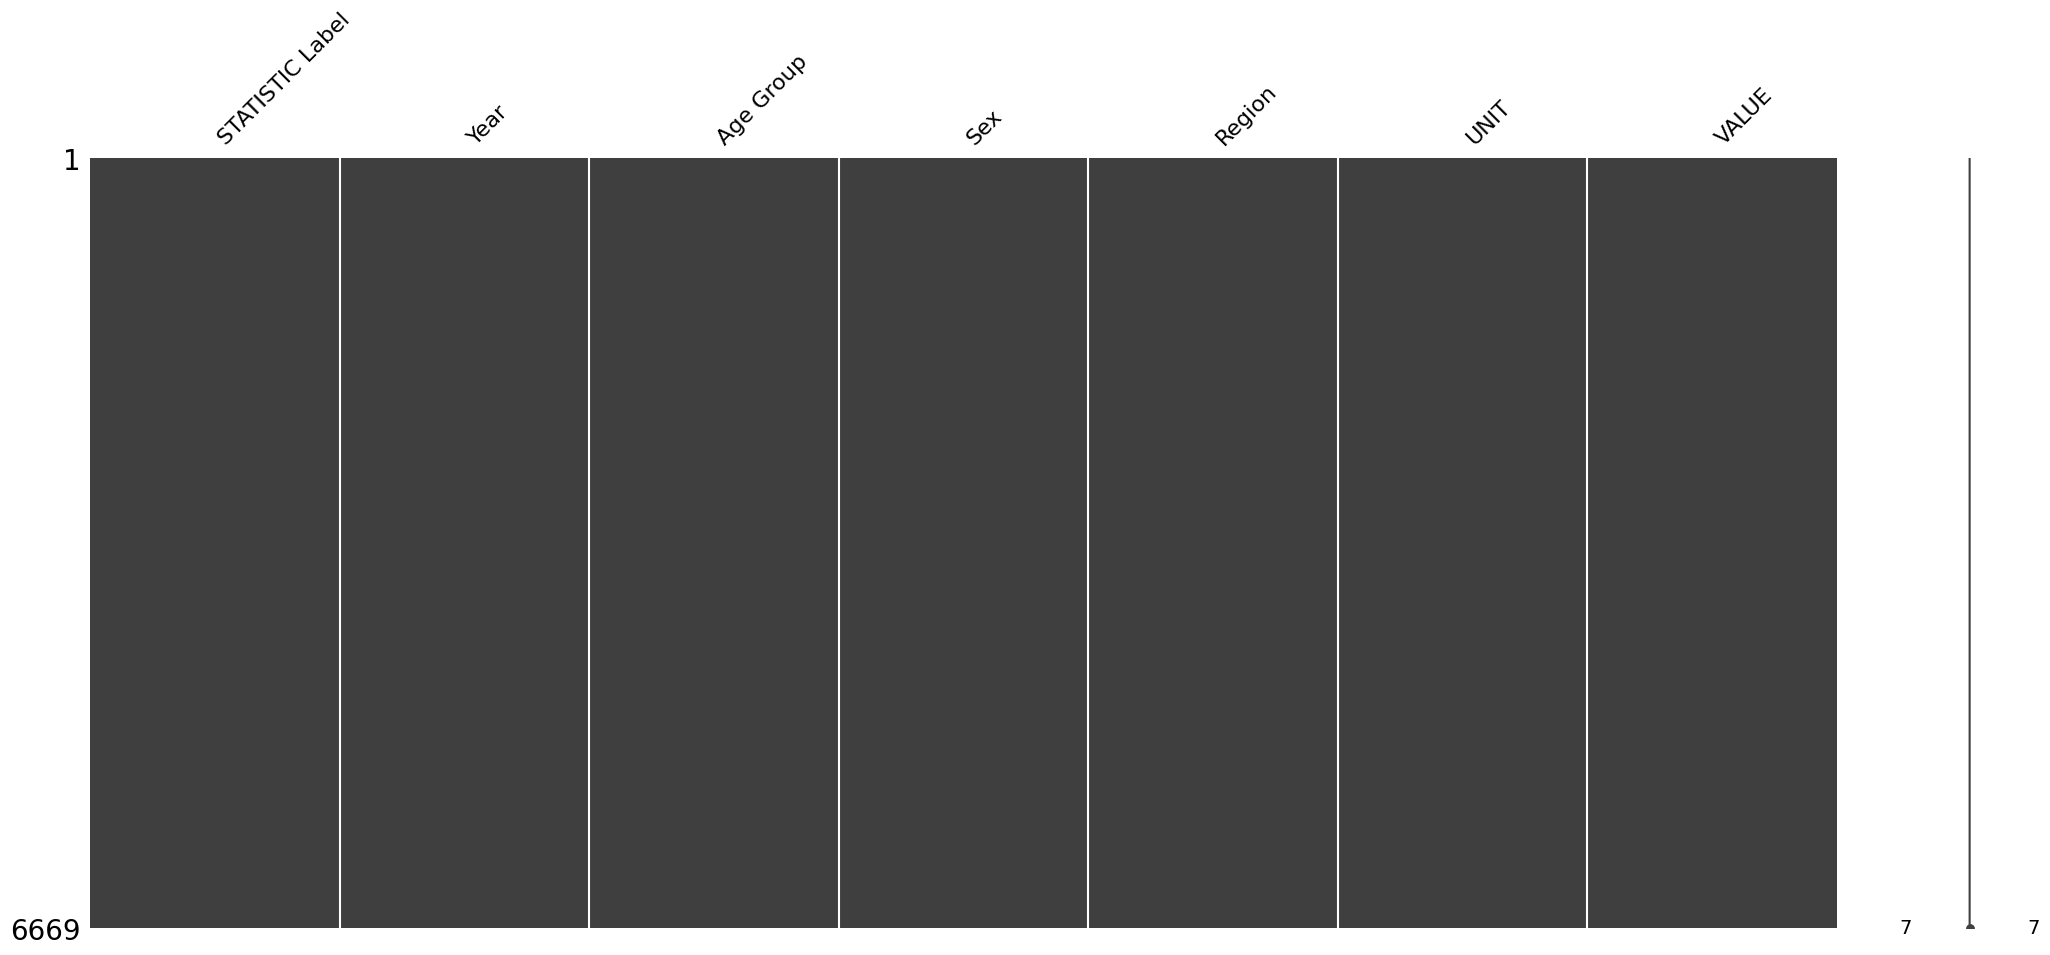

In [ ]:
msno.matrix(df)

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

STATISTIC Label    0.0
Year               0.0
Age Group          0.0
Sex                0.0
Region             0.0
UNIT               0.0
VALUE              0.0
dtype: float64


In [ ]:
df.shape

(6669, 7)

In [ ]:
df.nunique()

STATISTIC Label       1
Year                 13
Age Group            19
Sex                   3
Region                9
UNIT                  1
VALUE              1575
dtype: int64

In [ ]:
df.tail()

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
6664,Estimated Population (Persons in April),2023,All ages,Female,South-East,Thousand,237.5
6665,Estimated Population (Persons in April),2023,All ages,Female,South-West,Thousand,383.8
6666,Estimated Population (Persons in April),2023,All ages,Female,Dublin,Thousand,765.6
6667,Estimated Population (Persons in April),2023,All ages,Female,Mid-East,Thousand,391.3
6668,Estimated Population (Persons in April),2023,All ages,Female,Midland,Thousand,163.2


In [ ]:
df.dtypes

STATISTIC Label     object
Year                 int64
Age Group           object
Sex                 object
Region              object
UNIT                object
VALUE              float64
dtype: object

In [ ]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       STATISTIC Label   Year  Age Group    Sex  Region   UNIT  VALUE
0               False  False      False  False   False  False  False
1               False  False      False  False   False  False  False
2               False  False      False  False   False  False  False
3               False  False      False  False   False  False  False
4               False  False      False  False   False  False  False
...               ...    ...        ...    ...     ...    ...    ...
6664            False  False      False  False   False  False  False
6665            False  False      False  False   False  False  False
6666            False  False      False  False   False  False  False
6667            False  False      False  False   False  False  False
6668            False  False      False  False   False  False  False

[6669 rows x 7 columns]>

In [ ]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
6664    False
6665    False
6666    False
6667    False
6668    False
Length: 6669, dtype: bool>